pip install pymatgen --ignore-installed ruamel.yaml

In [ ]:
from pymatgen.ext.matproj import MPRester

with MPRester ("5WSgGixxkDsJiqQXzr") as m:
    
    #Création de la structure du cristal à partir du MP
    structure = m.get_structure_by_material_id("mp-9437")

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
/opt/anaconda3/lib/python3.8/site-packages/pymatgen/ext/matproj.py:186: UserWarning: You are using the legacy MPRester. This version of the MPRester will no longer be updated. To access the latest data with the new MPRester, obtain a new API key from https://materialsproject.org/api and consult the docs at https://docs.materialsproject.org/ for more information.
  warnings.warn(


Dans cette partie, il nous est demandé de déterminer les 3 premiers pics du diffractogramme correspondant à notre cristal et de préciser les indices hkl associés. Pour toute cette partie, on considère un rayonnement X incident Cu Kα de longueur d’onde λ=1.54060 Angström. Ces rayons X vont créer des phénomènes d'interférences constructives ou destructives selon la direction. Sur base du modèle de diffraction, nous pouvons trouver la position de chacun des atomes du cristal (en respectant certaines hypothèses).

Dans la suite de l'exercie, nous considèrerons $2\theta$ comme l'angle entre la direction d'incidence et celle d'observation (voir image ci-dessous).

<img src="https://github.com/samraym/lmapr1492/blob/main/Theta.png?raw=true" width="300">


La cellule utilisée pour cet exercice est la cellule primitive.

In [3]:
from pymatgen.analysis.diffraction.xrd import XRDCalculator

#Création d'un objet XRDCalculator
xrd = XRDCalculator(1.54060)

#Calcul du modèle de diffraction
pat = xrd.get_pattern(structure)
print(pat)

DiffractionPattern
$2\Theta$: [25.83191816 29.91476825 42.81630643 50.68283767 53.10827686 62.15553875
 68.46009772 70.49791493 78.42740291 84.22134999]
Intensity: [ 14.53286204  44.02298827 100.           6.38318125  11.70219234
  15.87694675   2.41893694  15.07096752  31.76864223   1.79359598]


Dans un premier temps, nous pouvons observer le diffractogramme de notre cristal. Celui-ci représente l'angle $2\theta$ en degré en fonction de l'intensité mise à l'échelle (de 0 à 100).

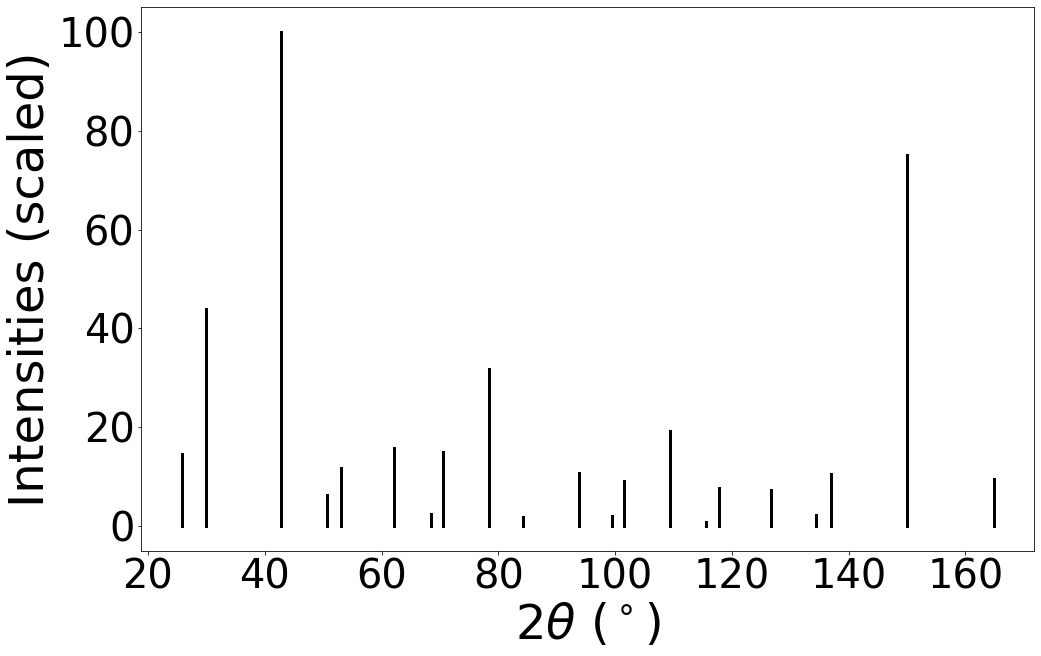

In [4]:
#Affichage du diffractogramme 
xrd.show_plot(structure,annotate_peaks=False,two_theta_range=[0,175])

# 1) Premier pic

In [5]:
#Récupération de l'angle du premier pic
theta1 = pat.x[0]

#Récupération de l'intensité du premier pic
I1 = pat.y[0]

#Récupération des indices hkl du premier pic
hkl1 = pat.hkls[0]

print('Angle du premier pic : ' + str(theta1) + ' degrés')
print('Intensité du premier pic : ' + str(I1))
print('Indices hkl du premier pic :' + str(hkl1))

Angle du premier pic : 25.831918163462795 degrés
Intensité du premier pic : 14.532862036541454
Indices hkl du premier pic :[{'hkl': (1, 1, 1), 'multiplicity': 2}, {'hkl': (1, 0, 0), 'multiplicity': 6}]


On peut voir que le premier pic se trouve à un angle $2\theta = 25.831918163462795$ degrés  donc un $\theta = 12.915959$ degrés et a une intensité de $14.532862036541454$. Les indices hkl correspondants sont $(1,1,1)$ et $(1,0,0)$ et ils possèdent une multiplicité de 2 et une multiplicité de 6.

# 2) Deuxième pic

In [6]:
theta2 = pat.x[1]
I2 = pat.y[1]
hkl2 = pat.hkls[1]
print('Angle du deuxième pic : ' + str(theta2) + ' degrés')
print('Intensité du deuxième pic : ' + str(I2))
print('Indices hkl du deuxième pic :' + str(hkl2))

Angle du deuxième pic : 29.91476825278656 degrés
Intensité du deuxième pic : 44.02298826612447
Indices hkl du deuxième pic :[{'hkl': (1, 1, 0), 'multiplicity': 6}]


On peut voir que le deuxième pic se trouve à un angle $2\theta = 29.91476825278656$ degrés  donc un $\theta = 14.95738413 $ degrés et a une intensité de $44.02298826612447$. Les indices hkl correspondants sont $(1,1,0)$ et ils possèdent une multiplicité de 6.

# 3) Troisième pic

In [7]:
theta3 = pat.x[2]
I3 = pat.y[2]
hkl3 = pat.hkls[2]
print('Angle du troisième pic : ' + str(theta3) + ' degrés')
print('Intensité du troisième pic : ' + str(I3))
print('Indices hkl du troisième pic :' + str(hkl3))


Angle du troisième pic : 42.81630642667814 degrés
Intensité du troisième pic : 100.0
Indices hkl du troisième pic :[{'hkl': (2, 1, 1), 'multiplicity': 6}, {'hkl': (1, 0, -1), 'multiplicity': 6}]


On peut voir que le premier pic se trouve à un angle $2\theta = 42.81630642667814$ degrés donc un $\theta = 42.81630643$ degrés et a une intensité de $100.0$. Les indices hkl correspondants sont $(2,1,1)$ et $(1,0,-1)$ et ils possèdent une multiplicité de 6 et une multiplicité de 6.

# Références

**Image:**

LMPAR1492 : Physique des matériaux (Gian-Marco Rignanese)